<a href="https://colab.research.google.com/github/hazalkntr/ML-project-intro-to-data-science/blob/main/sleep_disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [11]:
df.shape

(374, 13)

# New Section

In [8]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [12]:
#num of duplicates
df.duplicated().sum()

0

No need to drop duplicates since there is none.

In [13]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [15]:
#num of unique items
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

Drop person id because it is unique for every column.

In [16]:
df.drop('Person ID', axis = 1, inplace = True)

In [27]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [31]:
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})
df['BMI Category']

0         Overweight
1      Normal Weight
2      Normal Weight
3              Obese
4              Obese
           ...      
369       Overweight
370       Overweight
371       Overweight
372       Overweight
373       Overweight
Name: BMI Category, Length: 374, dtype: object

### Sleep Disorder Distribution

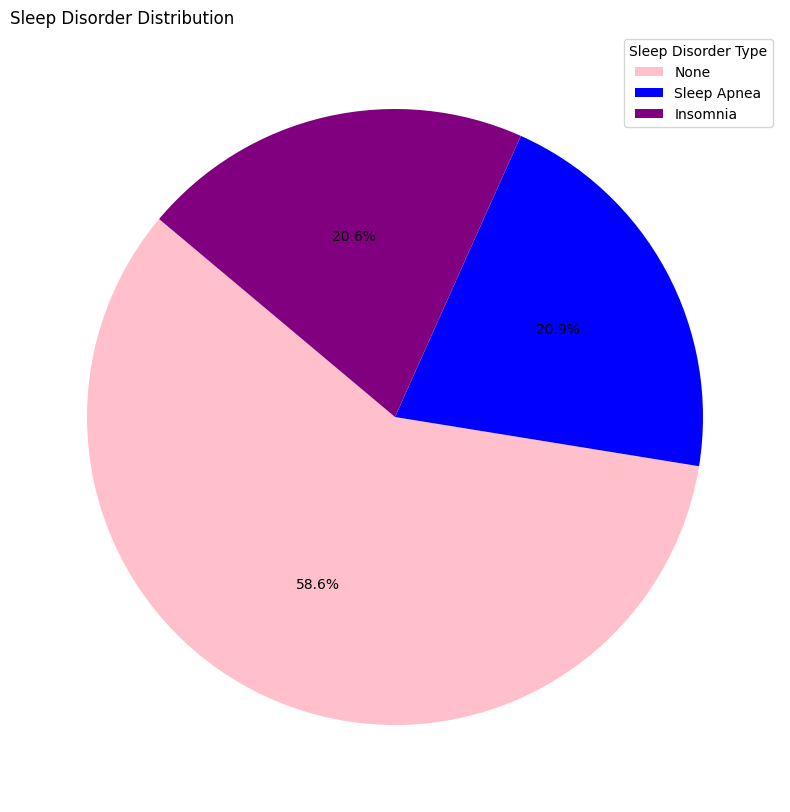

In [21]:
colors = ['pink', 'blue', 'purple']
sleep_count = df['Sleep Disorder'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(sleep_count, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sleep Disorder Distribution", loc='left')
plt.legend(labels=sleep_count.index, title="Sleep Disorder Type", loc="upper right")
plt.show()

### Sleep Disorder by Occupation

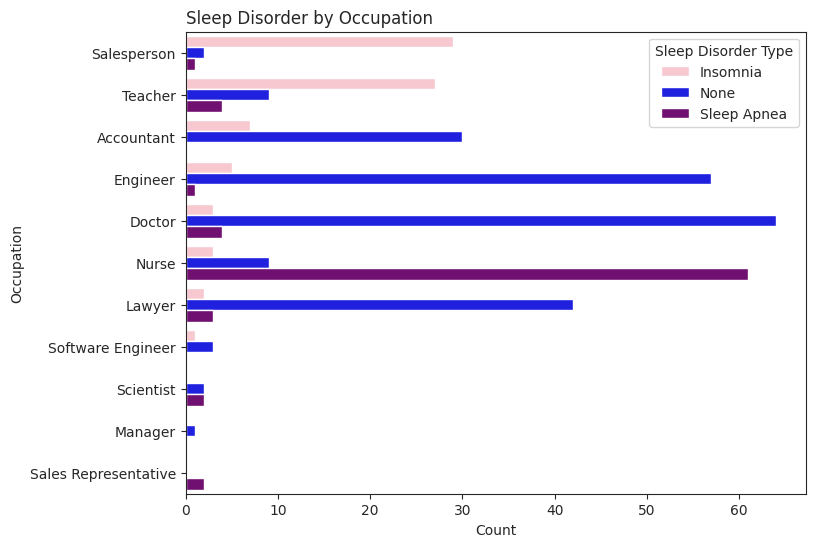

In [26]:
colors =  ['pink', 'blue', 'purple']
sleep_occupation = df.groupby('Sleep Disorder')['Occupation'].value_counts()
sleep_occupation = sleep_occupation.reset_index(name = "count")
sleep_occupationt = sleep_occupation.sort_values(by='Occupation', ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x = 'count',
            y = 'Occupation',
            hue = 'Sleep Disorder',
            data = sleep_occupation,
            palette = colors)

plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Sleep Disorder by Occupation', loc='left')
plt.legend(title='Sleep Disorder Type')

plt.show()

### Sleep Disorder by Gender

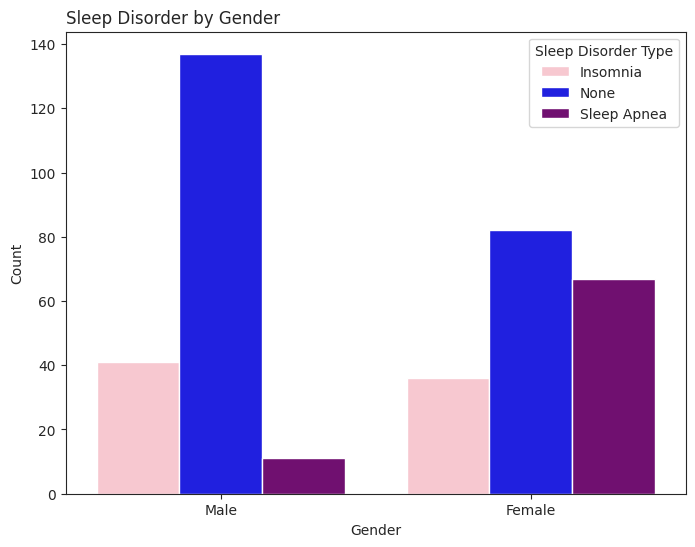

In [32]:
colors = ['pink', 'blue', 'purple']
sleep_gender = df.groupby('Sleep Disorder')['Gender'].value_counts()
sleep_gender = sleep_gender.reset_index(name= "count")

plt.figure(figsize=(8, 6))
sns.barplot(x = 'Gender',
            y = 'count',
            hue = 'Sleep Disorder',
            data = sleep_gender,
            palette = colors)
sns.set_style('ticks')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Sleep Disorder by Gender', loc='left')
plt.legend(title='Sleep Disorder Type')

plt.show()